**Autor** : Tobias Costa

**Data** : 27/09/2025

**Matrícula** : 4052025001370

**Dataset** : https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction/data

 ### **Objetivo** : Identificar os principais aspectos da experiência de voo que geram opiniões positivas e negativas e treinar modelo de classificação para auxiliar na retenção e aumento de clientes.


## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, GridSearchCV, cross_val_predict, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier


## Carregando os dados

In [2]:
url = 'https://raw.githubusercontent.com/tobcosta/datasetmvp-airline/refs/heads/main/airline_passenger_satisfaction.csv'

pesquisa_satisfacao = pd.read_csv(url)
pesquisa_satisfacao.head(10)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,...,4,4,4,3,3,4,4,4,4,Satisfied
6,7,Male,43,Returning,Business,Business,1963,0,0.0,3,...,5,5,5,4,5,5,3,5,5,Satisfied
7,8,Female,60,Returning,Business,Business,853,0,3.0,3,...,3,4,4,4,4,3,4,3,3,Satisfied
8,9,Male,50,Returning,Business,Business,2607,0,0.0,1,...,4,3,4,3,3,4,4,4,4,Neutral or Dissatisfied
9,10,Female,38,Returning,Business,Business,2822,13,0.0,2,...,5,4,5,4,2,5,2,5,5,Satisfied


In [3]:
url = 'https://raw.githubusercontent.com/tobcosta/datasetmvp-airline/refs/heads/main/data_dictionary.csv'

dicionario = pd.read_csv(url)
dicionario

,Field,Description
0,ID,Unique passenger identifier
1,Gender,Gender of the passenger (Female/Male)
2,Age,Age of the passenger
3,Customer Type,Type of airline customer (First-time/Returning)
4,Type of Travel,Purpose of the flight (Business/Personal)
5,Class,Travel class in the airplane for the passenger...
6,Flight Distance,Flight distance in miles
7,Departure Delay,Flight departure delay in minutes
8,Arrival Delay,Flight arrival delay in minutes
9,Departure and Arrival Time Convenience,Satisfaction level with the convenience of the...


###**Variáveis categoricas/numéricas**

ID - Identificador único do passageiro

Gênero - Gênero do passageiro (Feminino/Masculino)

Idade - Idade do passageiro

Tipo de Cliente - Tipo de cliente da companhia aérea (Primeira vez/Recorrente)

Tipo de Viagem - Propósito do voo (Negócios/Pessoal)

Classe - Classe de viagem do assento do passageiro no avião

Distância do Voo - Distância do voo em milhas

Atraso na Partida - Atraso na partida do voo em minutos

Atraso na Chegada - Atraso na chegada do voo em minutos

Satisfação - Nível geral de satisfação com a companhia aérea (Satisfeito/Neutro ou insatisfeito)



###**Variáveis ordinais representadas por pontuações de 1 a 5 (0 significa ""não se aplica"") (em ordem):**

Conveniência do Horário de Partida e Chegada

Facilidade de Reserva Online

Serviço de Check-in

Embarque Online

Localização do Portão

Serviço de Embarque

Conforto do Assento

Serviço de Espaço para as Pernas

Limpeza

Comida e Bebida

Serviço a Bordo

Serviço de Wifi a Bordo

Entretenimento a Bordo

Manuseio de Bagagem

-A satisfação do passageiro é definida com um CSAT score (pontuação de 1-5) para cada aspecto da experiência de vôo.

-A variável alvo é multiclasse (Satisfied / Neutral or disatisfied).

*Metas* -

    * Prever pontuação de satisfação

    * Classificar entre satisfeito e neutro ou insatisfeito

    * Identificar possíveis riscos de insatisfação de passageiros

## Análise exploratória

In [4]:
pesquisa_satisfacao['Class'].value_counts()

,count
Class,
Business,62160
Economy,58309
Economy Plus,9411


In [5]:
pesquisa_satisfacao['Customer Type'].value_counts()

,count
Customer Type,
Returning,106100
First-time,23780


In [6]:
pesquisa_satisfacao.drop('ID', axis=1, inplace=True)

In [7]:
pesquisa_satisfacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

In [8]:
pesquisa_satisfacao.isnull().sum()

,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,393
Departure and Arrival Time Convenience,0
Ease of Online Booking,0


In [9]:
pesquisa_satisfacao = pesquisa_satisfacao.dropna(subset=['Arrival Delay'])

## *Variáveis para encoding*

Gender (gênero) - Male/Female (masculino/feminino)

Costumer Type (tipo de cliente) - First time / Returning (primeira vez/retornando)

Type of Travel (tipo de viagem) - Business / Personal (negócios/pessoal)

Class (classe) - Economy / Economy plus / Business (econômica / econômica plus / executiva)

Satisfaction (satisfação) - Satisfied / Neutral or Dissatisfied (satisfeito / neutro ou insatisfeito)

In [10]:
pesquisa_satisfacao['gender_encoded'] = pesquisa_satisfacao['Gender'].map({'Male': 0, 'Female': 1})
pesquisa_satisfacao['customer_encoded'] = pesquisa_satisfacao['Customer Type'].map({'First-time': 0, 'Returning': 1})
pesquisa_satisfacao['type_encoded'] = pesquisa_satisfacao['Type of Travel'].map({'Business': 0, 'Personal': 1})
pesquisa_satisfacao['class_encoded'] = pesquisa_satisfacao['Class'].map({'Economy': 0, 'Economy Plus': 1, 'Business': 2})
pesquisa_satisfacao['satisfaction_encoded'] = pesquisa_satisfacao['Satisfaction'].map({'Satisfied': 0, 'Neutral or Dissatisfied': 1})

In [11]:
pesquisa_satisfacao['customer_encoded'] = pesquisa_satisfacao['customer_encoded'].astype(int)
pesquisa_satisfacao['Arrival Delay'] = pesquisa_satisfacao['Arrival Delay'].astype(int)

In [12]:
pesquisa_satisfacao['Total Delay'] = pesquisa_satisfacao['Departure Delay'] + pesquisa_satisfacao['Arrival Delay']

In [13]:
pesquisa_satisfacao.drop('Departure Delay', axis=1, inplace=True)
pesquisa_satisfacao.drop('Arrival Delay', axis=1, inplace=True)

In [14]:
pesquisa_satisfacao

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,...,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,gender_encoded,customer_encoded,type_encoded,class_encoded,satisfaction_encoded,Total Delay
0,Male,48,First-time,Business,Business,821,3,3,4,3,...,3,5,5,Neutral or Dissatisfied,0,0,0,2,1,7
1,Female,35,Returning,Business,Business,821,2,2,3,5,...,2,5,5,Satisfied,1,1,0,2,0,65
2,Male,41,Returning,Business,Business,853,4,4,4,5,...,4,3,3,Satisfied,0,1,0,2,0,0
3,Male,50,Returning,Business,Business,1905,2,2,3,4,...,2,5,5,Satisfied,0,1,0,2,0,0
4,Female,49,Returning,Business,Business,3470,3,3,3,5,...,3,3,3,Satisfied,1,1,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,28,Returning,Personal,Economy Plus,447,4,4,4,4,...,4,4,4,Neutral or Dissatisfied,0,1,1,1,1,5
129876,Male,41,Returning,Personal,Economy Plus,308,5,3,5,3,...,3,2,5,Neutral or Dissatisfied,0,1,1,1,1,0
129877,Male,42,Returning,Personal,Economy Plus,337,5,2,4,2,...,2,3,5,Neutral or Dissatisfied,0,1,1,1,1,20
129878,Male,50,Returning,Personal,Economy Plus,337,4,4,3,4,...,5,3,5,Satisfied,0,1,1,1,0,53


## Correlação e análise gráfica

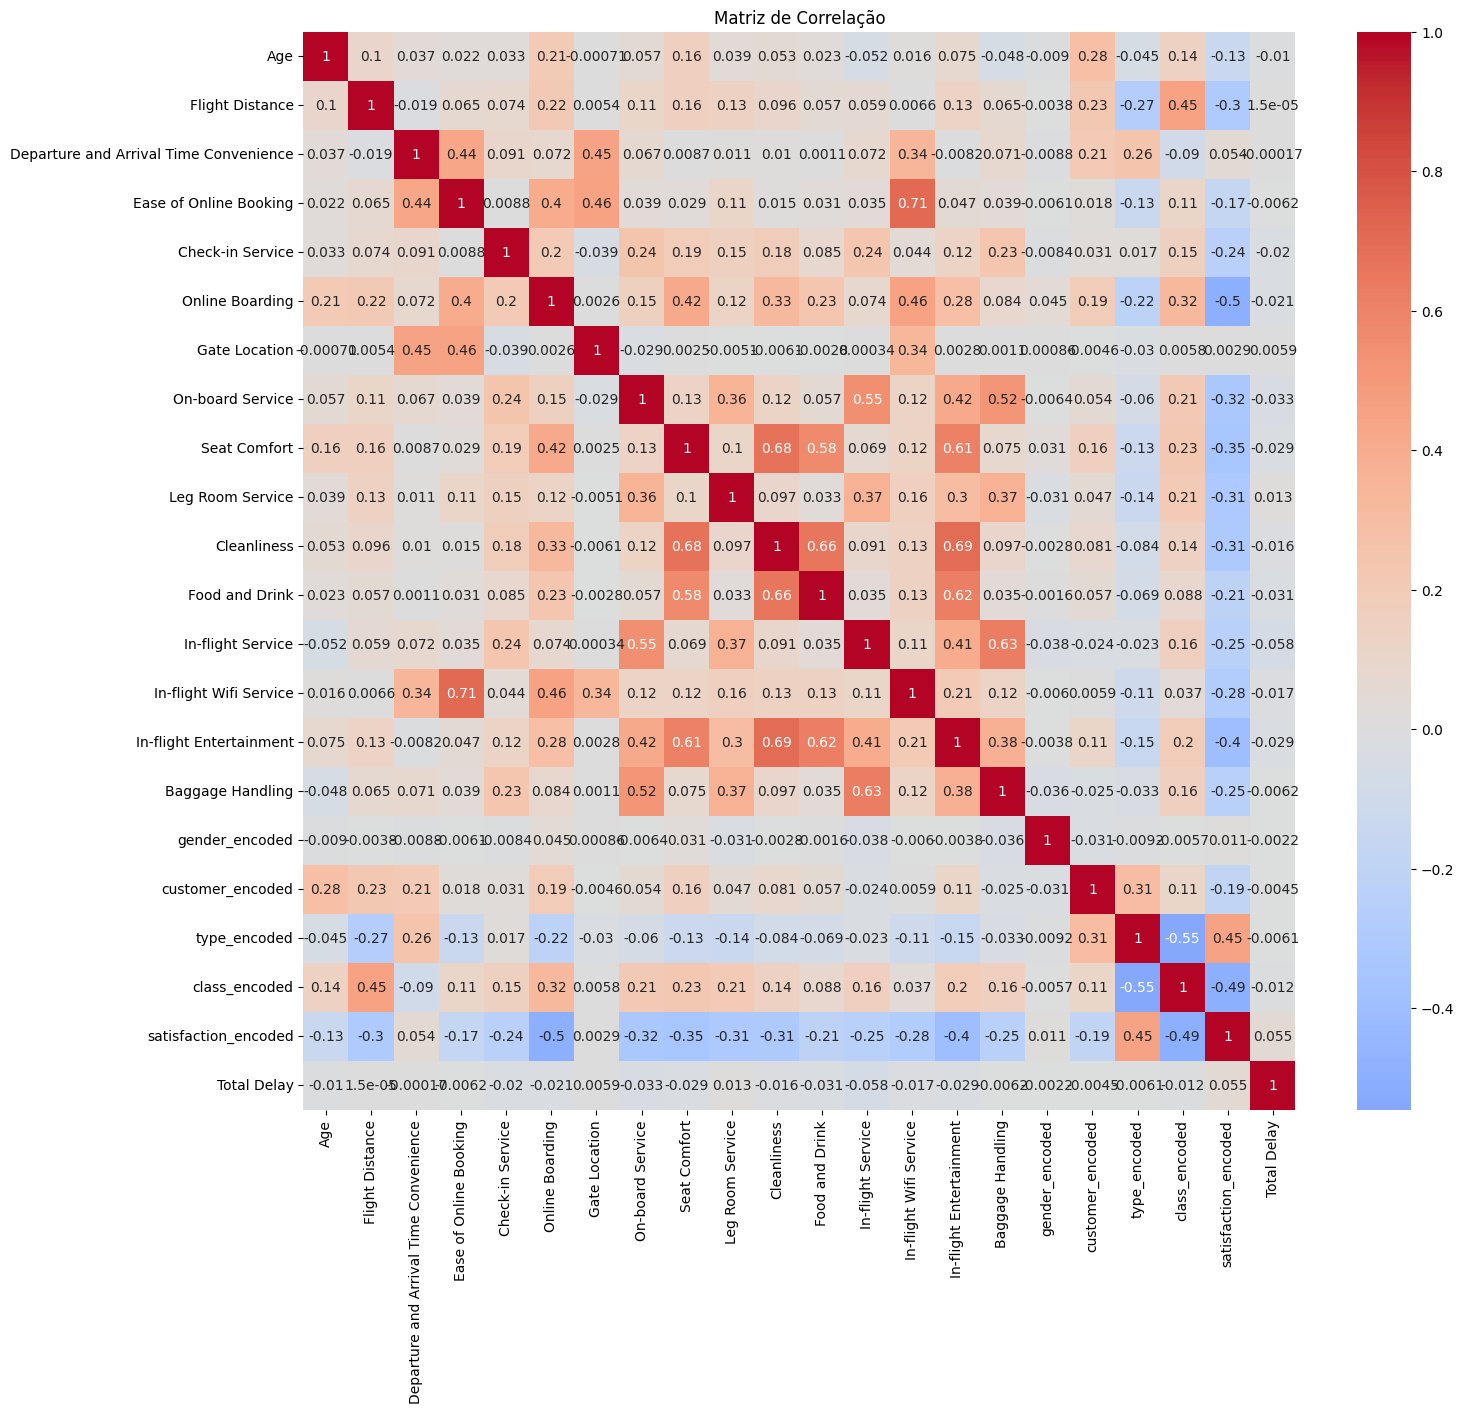

In [15]:
corr_matrix = pesquisa_satisfacao.corr(numeric_only=True)
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlação")
plt.show()

#### A matriz de correlação mostra que fatores como **conveniência do horário de partida e chegada**, **possíveis atrasos** (delay total) e **tipo de voo** correlacionam mais fortemente com a experiência de satisfação.

#### Apesar de não apresentarem correlação forte na matriz, vamos investigar como fatores como **idade** e **tempo de voô** se distribuem e se relacionam com a opinião de satisfação.


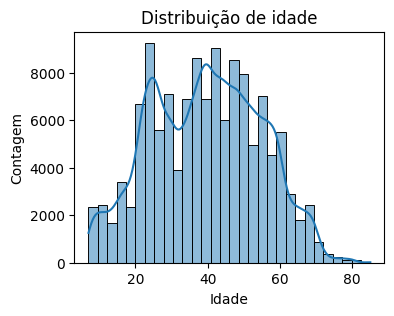

In [16]:
plt.figure(figsize=(4, 3))
sns.histplot(pesquisa_satisfacao['Age'], bins=30, kde=True)
plt.title("Distribuição de idade")
plt.xlabel("Idade")
plt.ylabel("Contagem")
plt.show()

/tmp/ipython-input-2389726743.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Neutro ou Insatisfeito", "Satisfeito"])


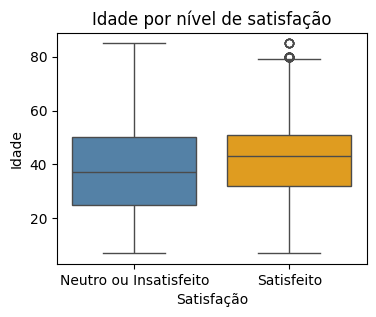

In [17]:
plt.figure(figsize=(4, 3))

colors = ['steelblue', 'orange']

ax = sns.boxplot(
    x='Satisfaction',
    y='Age',
    hue='Satisfaction',
    data=pesquisa_satisfacao,
    palette=colors,
    legend=False
)

ax.set_title("Idade por nível de satisfação")

ax.set_xlabel("Satisfação")
ax.set_ylabel("Idade")

ax.set_xticklabels(["Neutro ou Insatisfeito", "Satisfeito"])

plt.show()

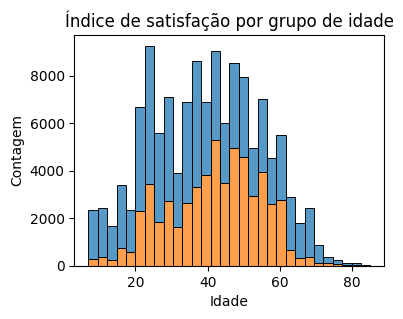

In [18]:
plt.figure(figsize=(4, 3))
sns.histplot(data=pesquisa_satisfacao, x='Age', hue='Satisfaction', multiple='stack', bins=30, legend=False)

plt.xlabel("Idade")
plt.ylabel("Contagem")
plt.title("Índice de satisfação por grupo de idade")

plt.show()

#### Relativo a **idade**, clientes satisfeitos tem estado mais na faixa dos **40-50 anos**. Clientes neutros ou insatisfeitos estão mais distribuidos etariamente, com maior representação de **clientes jovens**.

#### Os outliers sugerem que clientes na faixa de **70-80 anos** podem ter experiências satisfatórias, apesar de menos ocorrentes.


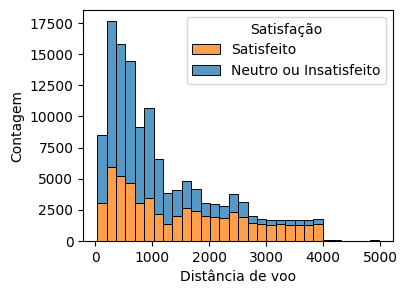

In [19]:
plt.figure(figsize=(4, 3))

plt.xlabel("Distância de voo")
plt.ylabel("Contagem")

sns.histplot(data=pesquisa_satisfacao, x='Flight Distance', hue='Satisfaction', multiple='stack', bins=30)

plt.legend(title='Satisfação', labels=['Satisfeito', 'Neutro ou Insatisfeito'])

#### Relativo a **distâncias de voo**, podemos observar que a maioria dos passageiros viaja em **voos de curta distância** (até 1000 milhas), com maioria de avaliações **neutras ou insatisfeitas**. Conforme a distância do voo aumenta, o número de passageiros diminui, assim como a proporção de clientes neutros ou insatisfeitos. A **qualidade das experiências** para voos longos se mostra **maior** como era de se esperar, porém a qualidade das experiências de voos mais rotineiros se mostra **abaixo do ideal**.

/tmp/ipython-input-2138352671.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Neutro ou Insatisfeito', 'Satisfeito'])


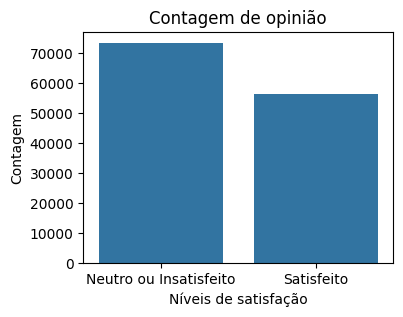

In [20]:
plt.figure(figsize=(4, 3))
ax= sns.countplot(data=pesquisa_satisfacao, x='Satisfaction')

plt.title("Contagem de opinião")
plt.xlabel("Níveis de satisfação")
plt.ylabel("Contagem")

ax.set_xticklabels(['Neutro ou Insatisfeito', 'Satisfeito'])
plt.show()

#### A maioria dos clientes se diz **neutro ou insatisfeito**.

## Feature selection

In [21]:
pesquisa_satisfacao.drop('Gender', axis=1, inplace=True)
pesquisa_satisfacao.drop('Customer Type', axis=1, inplace=True)
pesquisa_satisfacao.drop('Type of Travel', axis=1, inplace=True)
pesquisa_satisfacao.drop('Class', axis=1, inplace=True)
pesquisa_satisfacao.drop('Satisfaction', axis=1, inplace=True)

pesquisa_satisfacao

,Age,Flight Distance,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,gender_encoded,customer_encoded,type_encoded,class_encoded,satisfaction_encoded,Total Delay
0,48,821,3,3,4,3,3,3,5,2,...,5,3,5,5,0,0,0,2,1,7
1,35,821,2,2,3,5,2,5,4,5,...,5,2,5,5,1,1,0,2,0,65
2,41,853,4,4,4,5,4,3,5,3,...,3,4,3,3,0,1,0,2,0,0
3,50,1905,2,2,3,4,2,5,5,5,...,5,2,5,5,0,1,0,2,0,0
4,49,3470,3,3,3,5,3,3,4,4,...,3,3,3,3,1,1,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,28,447,4,4,4,4,2,5,1,4,...,5,4,4,4,0,1,1,1,1,5
129876,41,308,5,3,5,3,4,5,2,5,...,4,3,2,5,0,1,1,1,1,0
129877,42,337,5,2,4,2,1,3,3,4,...,4,2,3,5,0,1,1,1,1,20
129878,50,337,4,4,3,4,1,4,4,5,...,4,5,3,5,0,1,1,1,0,53


In [22]:
column_translation = {
    'Age': 'Idade',
    'Flight Distance': 'Distância de Voo',
    'Total Delay' : 'Atraso Total',
    'Departure and Arrival Time Convenience' : 'Conveniência do Horário de Partida e Chegada',
    'Ease of Online Booking': 'Facilidade de Reserva Online',
    'Check-in Service': 'Serviço de Check-in',
    'Online Boarding': 'Embarque Online',
    'Gate Location': 'Localização do Portão',
    'On-board Service': 'Serviço a Bordo',
    'Seat Comfort': 'Conforto do Assento',
    'Leg Room Service': 'Serviço de Espaço para as Pernas',
    'Cleanliness': 'Limpeza',
    'Food and Drink': 'Comida e Bebida',
    'In-flight Service': 'Serviço Durante o Voo',
    'In-flight Wifi Service': 'Serviço de Wifi Durante o Voo',
    'In-flight Entertainment': 'Entretenimento Durante o Voo',
    'Baggage Handling': 'Manuseio de Bagagem',
    'gender_encoded': 'gênero_codificado',
    'customer_encoded': 'cliente_codificado',
    'type_encoded': 'tipo_codificado',
    'class_encoded' : 'classe_codificada' ,
    'satisfaction_encoded': 'satisfacao_codificada',
}
pesquisa_satisfacao = pesquisa_satisfacao.rename(columns=column_translation)

new_columns = ['Idade',
    'Distância de Voo',
    'Atraso Total',
    'Conveniência do Horário de Partida e Chegada',
    'Facilidade de Reserva Online',
    'Serviço de Check-in',
    'Embarque Online',
    'Localização do Portão',
    'Serviço a Bordo',
    'Conforto do Assento',
    'Serviço de Espaço para as Pernas',
    'Limpeza',
    'Comida e Bebida',
    'Serviço Durante o Voo',
    'Serviço de Wifi Durante o Voo',
    'Entretenimento Durante o Voo',
    'Manuseio de Bagagem',
    'gênero_codificado',
    'cliente_codificado',
    'tipo_codificado',
    'classe_codificada' ,
    'satisfacao_codificada',]


pesquisa_satisfacao = pesquisa_satisfacao[new_columns]
pesquisa_satisfacao

,Idade,Distância de Voo,Atraso Total,Conveniência do Horário de Partida e Chegada,Facilidade de Reserva Online,Serviço de Check-in,Embarque Online,Localização do Portão,Serviço a Bordo,Conforto do Assento,...,Comida e Bebida,Serviço Durante o Voo,Serviço de Wifi Durante o Voo,Entretenimento Durante o Voo,Manuseio de Bagagem,gênero_codificado,cliente_codificado,tipo_codificado,classe_codificada,satisfacao_codificada
0,48,821,7,3,3,4,3,3,3,5,...,5,5,3,5,5,0,0,0,2,1
1,35,821,65,2,2,3,5,2,5,4,...,3,5,2,5,5,1,1,0,2,0
2,41,853,0,4,4,4,5,4,3,5,...,5,3,4,3,3,0,1,0,2,0
3,50,1905,0,2,2,3,4,2,5,5,...,4,5,2,5,5,0,1,0,2,0
4,49,3470,1,3,3,3,5,3,3,4,...,4,3,3,3,3,1,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,28,447,5,4,4,4,4,2,5,1,...,4,5,4,4,4,0,1,1,1,1
129876,41,308,0,5,3,5,3,4,5,2,...,2,4,3,2,5,0,1,1,1,1
129877,42,337,20,5,2,4,2,1,3,3,...,3,4,2,3,5,0,1,1,1,1
129878,50,337,53,4,4,3,4,1,4,4,...,3,4,5,3,5,0,1,1,1,0


In [23]:
array = pesquisa_satisfacao.values
X = array[:,0:21]
y = array[:,21]

### K-Best

In [24]:
best_var = SelectKBest(score_func=f_classif, k=5)

fit = best_var.fit(X, y)

features = fit.transform(X)

print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

print("\nAtributos Originais:", pesquisa_satisfacao.columns[0:21])

np.set_printoptions(precision=3)
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=pesquisa_satisfacao.columns[0:21]))


Número original de atributos: 21

Número reduzido de atributos: 5

Atributos Originais: Index(['Idade', 'Distância de Voo', 'Atraso Total',
       'Conveniência do Horário de Partida e Chegada',
       'Facilidade de Reserva Online', 'Serviço de Check-in',
       'Embarque Online', 'Localização do Portão', 'Serviço a Bordo',
       'Conforto do Assento', 'Serviço de Espaço para as Pernas', 'Limpeza',
       'Comida e Bebida', 'Serviço Durante o Voo',
       'Serviço de Wifi Durante o Voo', 'Entretenimento Durante o Voo',
       'Manuseio de Bagagem', 'gênero_codificado', 'cliente_codificado',
       'tipo_codificado', 'classe_codificada'],
      dtype='object')

Scores dos Atributos Originais: [2.368e+03 1.264e+04 3.952e+02 3.851e+02 3.793e+03 7.716e+03 4.354e+04
 1.106e+00 1.501e+04 1.791e+04 1.402e+04 1.346e+04 6.043e+03 8.271e+03
 1.130e+04 2.442e+04 8.533e+03 1.712e+01 4.636e+03 3.284e+04 4.159e+04]

Atributos Selecionados: ['Embarque Online' 'Conforto do Assento' 'Entretenimento 

### Eliminação recursiva

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

modelo = LogisticRegression(max_iter=5000)

rfe = RFE(modelo, n_features_to_select=5)
fit = rfe.fit(X, y)

print("Atributos Originais:", pesquisa_satisfacao.columns[0:21])

print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)
print("\nNomes dos Atributos Selecionados: %s" % fit.get_feature_names_out(input_features=pesquisa_satisfacao.columns[0:21]))

Atributos Originais: Index(['Idade', 'Distância de Voo', 'Atraso Total',
       'Conveniência do Horário de Partida e Chegada',
       'Facilidade de Reserva Online', 'Serviço de Check-in',
       'Embarque Online', 'Localização do Portão', 'Serviço a Bordo',
       'Conforto do Assento', 'Serviço de Espaço para as Pernas', 'Limpeza',
       'Comida e Bebida', 'Serviço Durante o Voo',
       'Serviço de Wifi Durante o Voo', 'Entretenimento Durante o Voo',
       'Manuseio de Bagagem', 'gênero_codificado', 'cliente_codificado',
       'tipo_codificado', 'classe_codificada'],
      dtype='object')

Atributos Selecionados: [False False False False False  True  True False  True False False False
 False False False False False False  True  True False]

Ranking de atributos: [15 17 16  9  6  1  1 13  1 10  2  3 14  7  5 12  8 11  1  1  4]

Qtd de melhores Atributos: 5

Nomes dos Atributos Selecionados: ['Serviço de Check-in' 'Embarque Online' 'Serviço a Bordo'
 'cliente_codificado' 'tipo_cod

### Feature Importance (Extra Trees)

In [26]:
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X,y)

print("\nAtributos Originais:", pesquisa_satisfacao.columns[0:21])

print(modelo.feature_importances_)


Atributos Originais: Index(['Idade', 'Distância de Voo', 'Atraso Total',
       'Conveniência do Horário de Partida e Chegada',
       'Facilidade de Reserva Online', 'Serviço de Check-in',
       'Embarque Online', 'Localização do Portão', 'Serviço a Bordo',
       'Conforto do Assento', 'Serviço de Espaço para as Pernas', 'Limpeza',
       'Comida e Bebida', 'Serviço Durante o Voo',
       'Serviço de Wifi Durante o Voo', 'Entretenimento Durante o Voo',
       'Manuseio de Bagagem', 'gênero_codificado', 'cliente_codificado',
       'tipo_codificado', 'classe_codificada'],
      dtype='object')
[0.022 0.021 0.014 0.019 0.039 0.031 0.116 0.018 0.036 0.049 0.034 0.034
 0.014 0.032 0.136 0.045 0.029 0.006 0.053 0.136 0.116]


### Para treinar o modelo vamos testar primeiro com **5 features** recomendadas pelos testes de atributos.

## Modelo de classificação

In [27]:
selected_features = ['Distância de Voo', 'Embarque Online','cliente_codificado','tipo_codificado','classe_codificada']

X = pesquisa_satisfacao[selected_features]
y = pesquisa_satisfacao['satisfacao_codificada']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=7)

KNN: 0.822143 (0.004090)
CART: 0.827993 (0.003483)
NB: 0.807180 (0.002775)


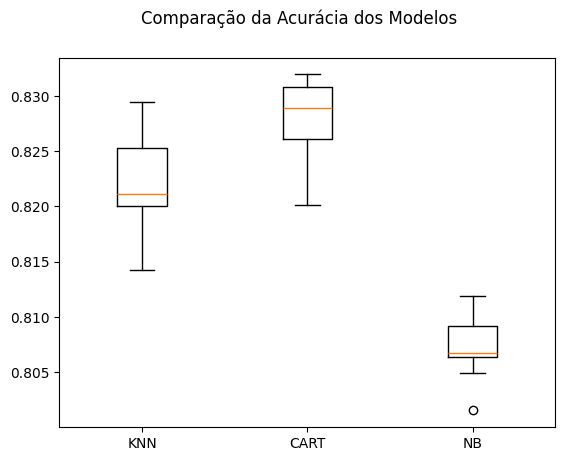

In [28]:
np.random.seed(7)

models = []
results = []
names = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [29]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(accuracy_score(y_test, predictions))

0.8330759131979304


### Agora considerando também atributos que chamaram atenção na matriz de **correlação**

In [30]:
selected_features = ['Distância de Voo', 'Embarque Online','Conveniência do Horário de Partida e Chegada', 'Atraso Total', 'cliente_codificado','tipo_codificado','classe_codificada']

X = pesquisa_satisfacao[selected_features]
y = pesquisa_satisfacao['satisfacao_codificada']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=7)

KNN: 0.749655 (0.002951)
CART: 0.807093 (0.002730)
NB: 0.809806 (0.003558)


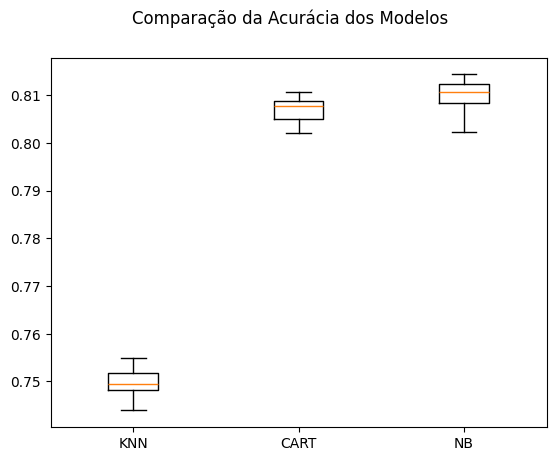

In [31]:
np.random.seed(7)

models = []
results = []
names = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [32]:
model = GaussianNB()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(accuracy_score(y_test, predictions))

0.8116842999459418


### A acurácia dos atributos de feature selection se mostrou mais promissora.

### Testando SVM

In [33]:
pipeline = make_pipeline(
    StandardScaler(),
    SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3, random_state=42)
)

scores = cross_val_score(pipeline, X, y, cv=5, n_jobs=-1)

print("Fast Linear SVM Accuracy:", scores.mean())

Fast Linear SVM Accuracy: 0.8294351173522851


In [34]:
X_small, _, y_small, _ = train_test_split(X, y, train_size=0.2, stratify=y, random_state=42)
pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='scale'))
scores = cross_val_score(pipeline, X_small, y_small, cv=5, n_jobs=-1)
print("Subset RBF SVM Accuracy:", scores.mean())

Subset RBF SVM Accuracy: 0.8600221566006466


### Decision Tree - Ajuste de hiperparâmetro

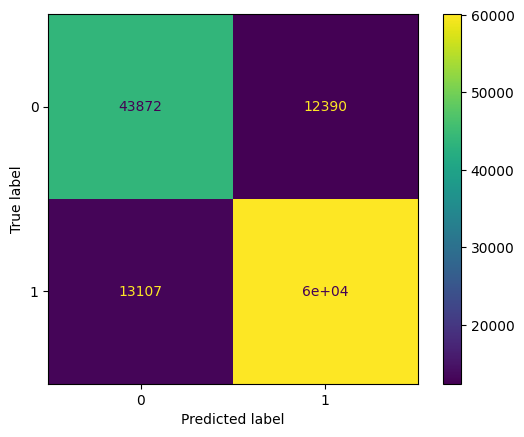

In [35]:
model = DecisionTreeClassifier(random_state=7)

y_pred = cross_val_predict(model, X, y, cv=10)

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [36]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77     56262
           1       0.83      0.82      0.83     73225

    accuracy                           0.80    129487
   macro avg       0.80      0.80      0.80    129487
weighted avg       0.80      0.80      0.80    129487



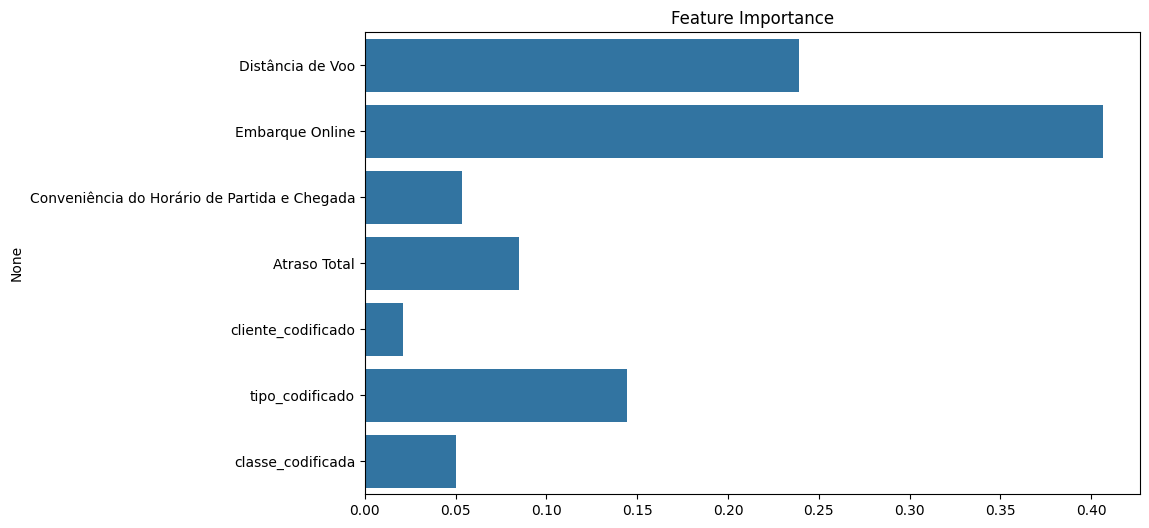

In [37]:
model = DecisionTreeClassifier(random_state=7)

model.fit(X, y)

importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.show()

In [38]:
dt = DecisionTreeClassifier(random_state=7)

param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}


grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)


grid_search.fit(X_train, y_train)


print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor acurácia de validação cruzada:", grid_search.best_score_)

best_model = grid_search.best_estimator_
print("Acurácia de teste:", best_model.score(X_test, y_test))


Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Melhor acurácia de validação cruzada: 0.8619255044990222
Acurácia de teste: 0.8669395320101938


## Testando outros modelos

In [39]:
model = RandomForestClassifier(n_estimators=100, random_state=7)
model.fit(X_train, y_train)
print("Acurácia:", model.score(X_test, y_test))

Acurácia: 0.8372847324117693


In [40]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
print("Acurácia:", model.score(X_test, y_test))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [19:16:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Acurácia: 0.866785079928952


In [41]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("Acurácia:", model.score(X_test, y_test))

Acurácia: 0.8295235153293691


In [42]:
num_trees = 100
max_features = 'sqrt'
base = DecisionTreeClassifier()

models = []
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))


voting_estimators = [
    ('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)),
    ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)),
    ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)),
    ('Ada', AdaBoostClassifier(n_estimators=num_trees)),
    ('GB', GradientBoostingClassifier(n_estimators=num_trees))
]

models.append(('Voting', VotingClassifier(estimators=voting_estimators, voting='hard')))


for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name} Test Accuracy: {acc:.4f}')

Bagging Test Accuracy: 0.8425
RF Test Accuracy: 0.8367
ET Test Accuracy: 0.8311
Ada Test Accuracy: 0.8513
GB Test Accuracy: 0.8657
Voting Test Accuracy: 0.8482


### O modelo XGB Classifier obteve a melhor acurácia. Com 86.7%, é possível ter um estimador suficiente para aplicações de pesquisa e coleta de dados para controle da experiência de clientes.

#### *Recursos computacionais*

In [43]:
import sys
import sklearn
import matplotlib
import xgboost

print(f"Python version: {sys.version}")
print(f"scikit-learn version: {sklearn.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"xgboost version: {xgboost.__version__}")

Python version: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
scikit-learn version: 1.6.1
pandas version: 2.2.2
numpy version: 2.0.2
matplotlib version: 3.10.0
xgboost version: 3.0.5


- Ambiente: Google Colab (gratuito)
- Hardware:
  - CPU: 2,6 GHz Dual-Core Intel Core i5
  - GPU: NVIDIA Tesla T4 (ativada)
  - RAM: 8 GB 1600 MHz DDR3
  - Tempo de treinamento : aproximadamente 6 minutos
  - Tempo de total de execução: aproximadamente 8 minutos
- Software:
  - Sistema: MacOS Big Sur 11.7.10 (Colab padrão)